In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

/home/grzegorz/miniconda3/envs/gk_py/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
test_txt = 'data/zip_test.txt'
train_txt = 'data/zip_train.txt'
# train_raw = np.loadtxt(train_txt, delimiter=',', usecols=(0, 2), unpack=True)
train_raw = np.loadtxt(train_txt)
test_raw = np.loadtxt(test_txt)

In [3]:
train_lab = train_raw[:, 0]
train_raw = train_raw[:, 1:]

test_lab = test_raw[:, 0]
test_raw = test_raw[:, 1:]

print(train_lab.size)
print(train_raw[0].size)
print(len(train_raw[4]))

7291
256
256


In [4]:
# Cleaning the data
train_mat = list()
for ith in train_raw:
    image = np.resize(ith,(16,16))
    train_mat.append(image)
train_mat = np.array(train_mat)

test_mat = list()
for ith in test_raw:
    image = np.resize(ith,(16,16))
    test_mat.append(image)
test_mat = np.array(test_mat)

8.0
(7291, 16, 16)


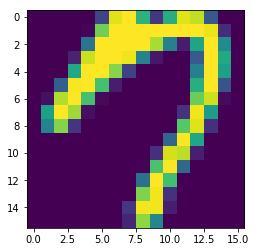

In [5]:
idn = 110
print(train_lab[idn])
mgplot = plt.imshow(train_mat[10])
print(train_mat.shape)

In [26]:
# len(train_raw[2][1:])

batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 16, 16

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_mat.reshape(train_mat.shape[0], img_rows, img_cols, 1)
x_test = test_mat.reshape(test_mat.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_lab.astype('int'), num_classes)
y_test = keras.utils.to_categorical(test_lab.astype('int'), num_classes)

x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


Train on 7291 samples, validate on 2007 samples
Epoch 1/6
7291/7291 [==============================] - 9s 1ms/step - loss: 1.1741 - acc: 0.7363 - val_loss: 0.6653 - val_acc: 0.8560
Epoch 2/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.4119 - acc: 0.9255 - val_loss: 0.3953 - val_acc: 0.9053
Epoch 3/6
7291/7291 [==============================] - 12s 2ms/step - loss: 0.2400 - acc: 0.9558 - val_loss: 0.2912 - val_acc: 0.9292
Epoch 4/6
7291/7291 [==============================] - 13s 2ms/step - loss: 0.1542 - acc: 0.9750 - val_loss: 0.2404 - val_acc: 0.9397
Epoch 5/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.1133 - acc: 0.9816 - val_loss: 0.2056 - val_acc: 0.9472
Epoch 6/6
7291/7291 [==============================] - 10s 1ms/step - loss: 0.0825 - acc: 0.9877 - val_loss: 0.1781 - val_acc: 0.9502
Test loss: 0.17807828861056244
Test accuracy: 0.9501743897550665


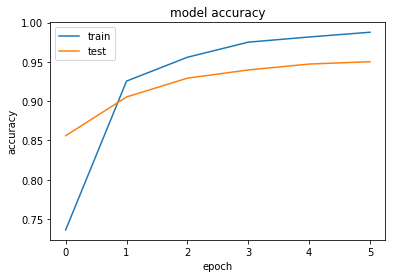

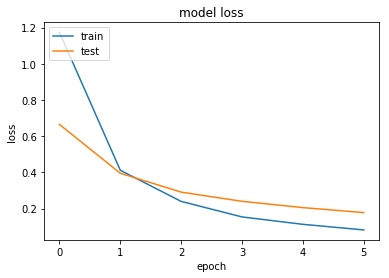

In [28]:
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_1 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_acc.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_1_loss.jpg')
plt.show()

In [20]:
print(num_classes)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

10
(7291, 16, 16, 1)
(7291, 10)
(2007, 16, 16, 1)
(2007, 10)


In [ ]:
# (2) Locally connected  with  no  weights shared inthe
# first  three  layers,  where  each  input/neuron  is 
# connected to the neurons in a local neighbor in the next layer
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_2 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_acc.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_2_loss.jpg')
plt.show()

In [ ]:
# (3) Locally connected with weights shared in the first three layers
# (i.e., a convolutional neural network
# Task I –Neural Network Design

# (1) Fully connected, where each input/neuron is connected to all the ne
# urons in the next layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

task_I_3 = model.fit(x_train, y_train, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# -------- Figures ---------------
plt.plot(task_I_1.history['acc'])
plt.plot(task_I_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_acc.jpg')
plt.show()

plt.plot(task_I_1.history['loss'])
plt.plot(task_I_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('task_I_3_loss.jpg')
plt.show()